In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_csv('retail_data.csv')
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
0,1,58,Male,60038,41,Health & Beauty,147.43,2022-06-11,46,San Jose,Credit Card,True,26,109.10,38.33,336,26,9107.90,171.55
1,2,57,Male,31577,91,Health & Beauty,402.09,2023-06-05,53,Los Angeles,Mobile Payment,True,1,398.07,4.02,491,32,1746.77,419.19
2,3,39,Female,117404,26,Groceries,958.45,2020-10-14,95,Philadelphia,Mobile Payment,False,0,958.45,0.00,157,3,2030.49,835.92
3,4,33,Male,87434,94,Electronics,544.17,2021-08-27,24,Dallas,Credit Card,False,0,544.17,0.00,223,87,6242.68,620.36
4,5,18,Male,90225,10,Health & Beauty,645.75,2023-06-06,2,San Antonio,Credit Card,False,0,645.75,0.00,315,8,6008.89,600.49


In [3]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
AnnualIncome            0
SpendingScore           0
ProductCategory         0
ProductPrice            0
PurchaseDate            0
StoreID                 0
StoreLocation           0
PaymentMethod           0
DiscountApplied         0
DiscountPercent         0
ProductCost             0
Profit                  0
FootTraffic             0
InventoryLevel          0
MarketingExpenditure    0
CompetitorPrice         0
dtype: int64

In [4]:
df.fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7504\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
# Basic exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CustomerID            200000 non-null  int64  
 1   Age                   200000 non-null  int64  
 2   Gender                200000 non-null  object 
 3   AnnualIncome          200000 non-null  int64  
 4   SpendingScore         200000 non-null  int64  
 5   ProductCategory       200000 non-null  object 
 6   ProductPrice          200000 non-null  float64
 7   PurchaseDate          200000 non-null  object 
 8   StoreID               200000 non-null  int64  
 9   StoreLocation         200000 non-null  object 
 10  PaymentMethod         200000 non-null  object 
 11  DiscountApplied       200000 non-null  bool   
 12  DiscountPercent       200000 non-null  int64  
 13  ProductCost           200000 non-null  float64
 14  Profit                200000 non-null  float64
 15  

In [6]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,ProductPrice,StoreID,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000
mean,100000.500000,43.969475,85058.438785,50.417900,504.591928,50.418075,7.484810,466.868615,37.723312,524.944335,49.94360,5038.608535,504.746194
std,57735.171256,15.277401,37511.311914,28.864392,286.427125,28.835288,9.803708,271.084205,60.786853,274.168526,29.12104,2857.425697,294.172524
min,1.000000,18.000000,20001.000000,1.000000,10.000000,1.000000,0.000000,7.210000,0.000000,50.000000,0.00000,100.090000,8.120000
25%,50000.750000,31.000000,52577.000000,25.000000,255.730000,25.000000,0.000000,233.490000,0.000000,288.000000,25.00000,2568.380000,252.460000
50%,100000.500000,44.000000,85184.500000,50.000000,504.675000,50.000000,0.000000,461.105000,0.000000,524.000000,50.00000,5033.750000,498.025000
75%,150000.250000,57.000000,117460.250000,75.000000,752.740000,75.000000,15.000000,688.650000,55.832500,762.000000,75.00000,7508.137500,744.020000
max,200000.000000,70.000000,150000.000000,100.000000,1000.000000,100.000000,30.000000,1000.000000,299.870000,1000.000000,100.00000,9999.980000,1197.140000


In [7]:
# Feature selection: Choose relevant features
features = df[['Age', 'AnnualIncome', 'SpendingScore', 'ProductPrice', 
                 'DiscountPercent', 'ProductCost', 'Profit', 'FootTraffic', 
                 'InventoryLevel', 'MarketingExpenditure', 'CompetitorPrice']]


In [8]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

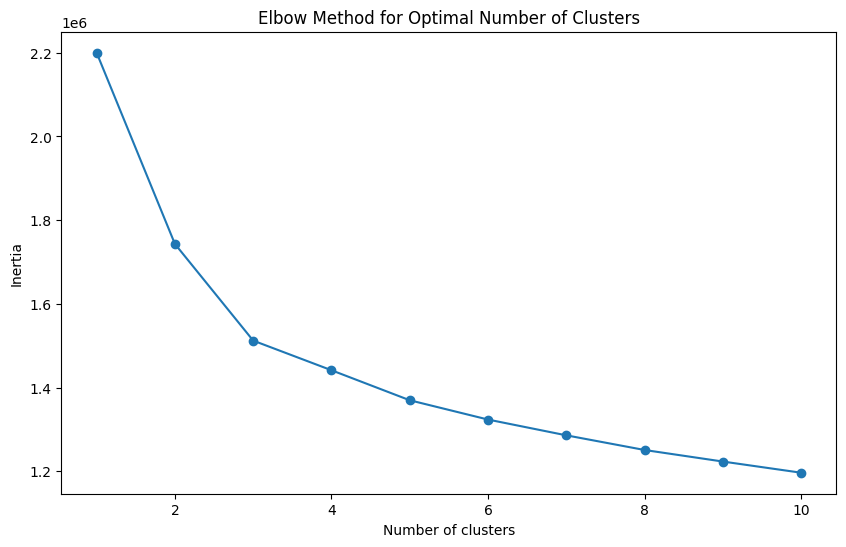

In [10]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
# Based on the Elbow method, choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

In [12]:
# Add cluster labels to the original dataset
df['Cluster'] = clusters

In [13]:
# Visualize clusters using PCA for 2D plotting
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

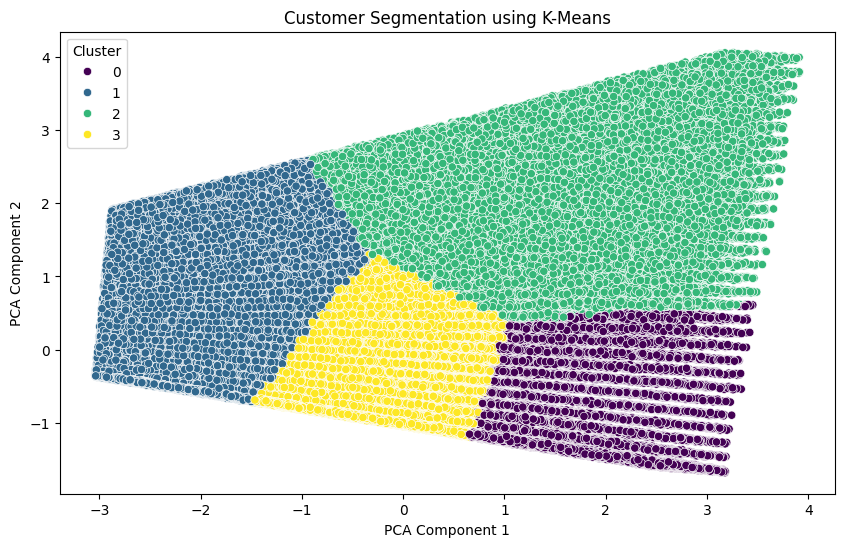

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

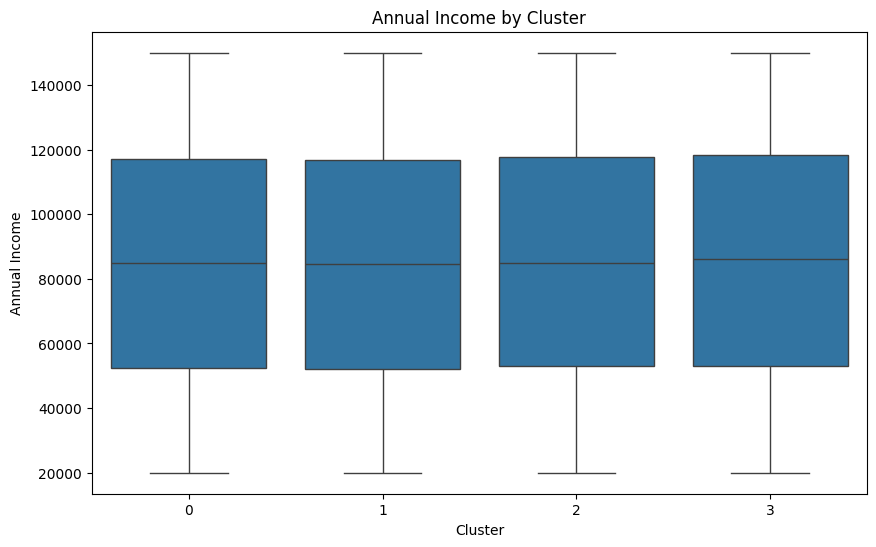

In [16]:
# Additional visualization: Boxplot of 'AnnualIncome' by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='AnnualIncome', data=df)
plt.title('Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income')
plt.show()